In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pontos = pd.read_csv("pontos.xlsx.csv", sep=';')
premios = pd.read_csv("premios.csv", sep=';')
titulos = pd.read_csv("titulos.csv", sep=';')
participacao_jogadores = pd.read_csv("participacao_jogadores.csv", sep=';')
participacao = pd.read_csv("participacoes.csv", sep=';')

###### O intuito desta análise é apenas conhecer um pouco do cenário brasileiro de League of Legends, se tratando de números de jogadores e equipes. Todos os dados eu extrai da web, e organizei em alguns csvs, sem muito critério, a ideia é analisar e visualizar as informações por aqui.

#### Particiçação 
##### Vamos conhecer quais as equipes mais tradicionais do cenário de Esports do Brasil, na modalidade do League of Legends.


###### Visualizando o DataFrame referente as participações.

In [3]:
participacao.head()

,Equipe,Participações,Edições das quais participou
0,CNB e-Sports Club,14,"2012,2013,2014(1ª e 2ª),2015(1ª e 2ª),2016(1ª ..."
1,Vivo Keyd,14,"2013(como Keyd Team),2014(1ª e 2ª),2015(1ª , 2..."
2,KaBuM! e-Sports,14,"2014(1ª e 2ª),2015(1ª,2ª e Pós-Temporada como ..."
3,INTZ e-Sports,14,"2014(2ª),2015(1ª,2ª e Pós-Temporada),2016(1ª e..."
4,paiN Gaming,14,"2012,2013,2014(1ª e 2ª),2015(1ª e 2ª), 2016(1ª..."


####  O CBLOL teve sua primeira edição em 2012, então primeira análise que eu queria era saber quais foram as equipes que disputaram a primeira edição do campeonato.
#### Para isso, utilizo do recurso startswith para filtrar, pelo index, quais são as equipes.

In [4]:
participacao['Edições das quais participou'] = participacao['Edições das quais participou'].str.startswith('2012', na=False)
participacao.loc[participacao['Edições das quais participou'] == True]


,Equipe,Participações,Edições das quais participou
0,CNB e-Sports Club,14,True
4,paiN Gaming,14,True
17,RMA,2,True
26,vTi Ignis,1,True
27,vTi Nox,1,True
28,Influxo,1,True
29,Insight,1,True
30,Verdict,1,True


#### Sendo assim, sabemos que as equipes que disputaram a primeira edição do CBLOL foram: CNB e-Sports Club, paiN Gaming, RMA, vTi Ignis,vTi Nox, Influxo, Insight, Verdict.
#### Em 2021 o CBLOL adota o modelo de franquia, nesta nova modalidade, as equipes são fixas, e não existem mais rebaixamento. O que podemos observar é que, das 09 equipes que participaram da primeira edição, apenas a Pain Gaming se encontra hoje ainda ativa no campeonato.
<img src="CBLOL2021.png" >



#### Agora, vamos saber quais equipes, em todo histórico, somaram mais pontos, menos pontos, e chegaram em mais finais.

In [5]:
pontos.head()

,Equipe,Pontos Ganhos,Vitórias,Empates,Derrotas,Finais Participadas
0,vTi Nox,6,2,0,1,1
1,vTi Ignis,9,3,0,0,1
2,Vivo Keyd,149,44,17,20,5
3,TShow,0,0,0,7,0
4,Team United,5,1,2,7,0


#### Segundo dataset: pontuação das equipes no CBLoL
#### Durante o CBLoL as equipes que disputam vão acumulando pontos na competição. Consequentemente eu já tinha em mente que essa análise era um pouco falha, visto que equipes mais antigas provavelmente teriam mais pontos que as mais novas. 
#### Apesar disso, quis manter a ideia, para treinar um pouco da visualização de dados. Fiz um simples gráfico de barras, para poder visualizar as 5 equipes que mais pontuaram na história do CBLoL

In [6]:
sorted_pontos = pontos.sort_values(by=['Pontos Ganhos'],ignore_index=True,na_position='first')
sorted_pontos = sorted_pontos.tail()

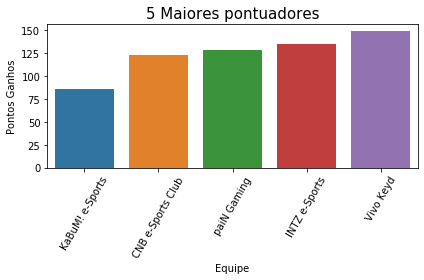

In [7]:
#criando uma figure, axes
fig, ax = plt.subplots()
#Adicionando um título
ax.set_title("5 Maiores pontuadores", fontdict={'fontsize':15})
#Colocando na inclinação os nomes das equipes
plt.xticks(rotation = 60)
#criando o gráfico de barras 
sns.barplot(x=sorted_pontos['Equipe'], y=sorted_pontos['Pontos Ganhos'], ax=ax, data=sorted_pontos)
#otimizar espaço da figure
fig.tight_layout();

#### Conforme já esperado, CNB, Keyd e Pain constaram no top 5, mas minha surpresa foi reparar que INTZ e KaBum, que surgiram no cenário em 2014, 2 anos após a primeira edição, ja estavam no Top 5.

In [8]:
titulos

,Equipe,Títulos,Vices,Edições em que foi campeão,Edições em que foi vice,Ref
0,INTZ e-Sports,5,2,"2015 (1ª), 2016 (1ª e 2ª), 2019 (1ª), 2020 (2ª)","2015 (2ª), 2019 (2ª)",[101]-
1,KaBuM!,4,0,"2014 (2ª), 2018 (1ª e 2ª), 2020 (1ª)",Nenhuma,NaN
2,paiN Gaming,2,3,"2013 , 2015 ( 2ª)","2014 (1°), 2017 (2ª), 2020 (2ª)",[102]
3,Vivo Keyd,1,4,2014 (1ª),"2015 (1ª), 2016 (1ª), 2017 (1ª), 2018 (1ª)",[103]
4,Flamengo eSports,1,3,2019 (2ª),"2018 (2ª), 2019 (1ª), 2020 (1ª)",NaN
5,vTi Ignis,1,0,2012,Nenhuma,NaN
6,RED Canids,1,0,2017 (1ª),Nenhuma,[104]
7,Team oNe eSports,1,0,2017 (2ª),Nenhuma,NaN
8,CNB e-Sports Club,0,3,Nenhuma,"2013, 2014(2ª), 2016 (2ª)",NaN
9,vTi Nox,0,1,Nenhuma,2012,NaN


#### Neste dataset, toda análise foi feita apenas visualizando o DataFrame. Creio que não seja a forma mais bonita para tal, mas já era possível fazer as considerações.

In [9]:
titulos = titulos[['Equipe', 'Títulos', 'Vices']]
titulos

,Equipe,Títulos,Vices
0,INTZ e-Sports,5,2
1,KaBuM!,4,0
2,paiN Gaming,2,3
3,Vivo Keyd,1,4
4,Flamengo eSports,1,3
5,vTi Ignis,1,0
6,RED Canids,1,0
7,Team oNe eSports,1,0
8,CNB e-Sports Club,0,3
9,vTi Nox,0,1


#### Algumas análises que conseguimos fazer, apenas observando os títulos das equipes, é primeiramente o quão a INTZ é uma equipe forte em finais, sendo a que mais chegou em finais em todo CBLOL, mesmo iniciando sua jornada em 2014, a equipe já chegou em 7 finais.
#### Outra observação interessante é que, o Flamengo, apesar de possuir 3 vices, é uma organização que chegou a competição no segundo semestre de 2018, ou seja, participou ate então de 5 edições do CBLOL, e ainda assim, sendo uma organização extremamente jovem, chegou a final em 4 das 5 edições.
#### Ponto a se destacar é a KaBum, que nunca perdeu uma final que disputou, sendo 4 finais e 4 vitórias. 
####  E apesar de termos o Flamengo na competição, a brincadeira do cheirinho fica com a CNB, que apesar de estar na competição desde 2012, sendo sua última participação no segundo semestre de 2019, nunca foi campeã, sendo 3 vices na conta.

In [10]:
participacao_jogadores.head()

,Jogador,Títulos,Vices,Edições em que foi campeão,Edições em que foi vice
0,"Ygor ""RedBert"" Freitas",3,1,"2017 (2ª), 2019 (1ª) e 2020 (2ª)",2019 (2ª)
1,"Thúlio ""SirT"" Carlos da Silva",2,0,2013 e 2015(2ª),Nenhuma
2,"Thiago ""TinOwns"" Sartori",1,3,2014(Final Regional),"2015(Pós-Temporada), 2016(2ª) e 2020(2ª)"
3,"Rodrigo ""Tay"" Panisa",2,2,2019(1ª) e 2020(2ª),2017(2ª) e 2019(2ª)
4,"Rafael ""rafes"" Peres",1,0,2012,Nenhuma


#### Neste quarto dataset, temos as informações de títulos e vices de cada jogador que ja participou do CBLoL.
#### Primeiramente foi necessário tratar um pouco os dados, para facilitar a visualização em gráficos, para isso utilizei do sort_values()
#### Além disso, criei uma nova coluna, somando títulos e vices, para constar participações em finais.

In [11]:
participacao_jogadores = participacao_jogadores[['Jogador', 'Títulos', 'Vices']]
participacao_jogadores.head()

,Jogador,Títulos,Vices
0,"Ygor ""RedBert"" Freitas",3,1
1,"Thúlio ""SirT"" Carlos da Silva",2,0
2,"Thiago ""TinOwns"" Sartori",1,3
3,"Rodrigo ""Tay"" Panisa",2,2
4,"Rafael ""rafes"" Peres",1,0


In [12]:
part_jog_sort = participacao_jogadores.sort_values(by=['Títulos'],ascending=False, ignore_index=True,na_position='first')
part_jog_sort1 = part_jog_sort.head(10)
part_jog_sort1['Finais'] = part_jog_sort1['Títulos'] + part_jog_sort1['Vices']
part_jog_sort1.head(3)

C:\Users\luigi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Jogador,Títulos,Vices,Finais
0,"Felipe ""brTT"" Gonçalves",5,3,8
1,"Micael ""micaO"" Rodrigues",4,3,7
2,"Gabriel ""Tockers"" Claumann",4,2,6


In [13]:
part_jog_sort = participacao_jogadores.sort_values(by=['Vices'],ascending=False, ignore_index=True,na_position='first')
part_jog_sort2 = part_jog_sort.head(10)
part_jog_sort2.head(3)

,Jogador,Títulos,Vices
0,"Murilo ""Takeshi"" Alves",0,5
1,"Caio ""Loop"" Almeida",2,3
2,"Thiago ""TinOwns"" Sartori",1,3


### Treinando um pouco da visualização da dados, conseguimos chegar a esta visualização dos 5 mais vitoriosos do CBLoL.

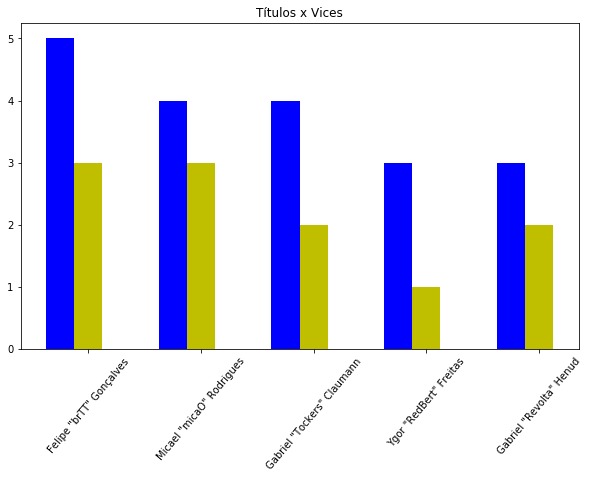

In [14]:
# Quantidade de Títulos
participacao_jogadores_t = part_jog_sort1['Títulos'].head(5)

# Quantidade de Vices
participacao_jogadores_v = part_jog_sort1['Vices'].head(5)

plt.figure(figsize = (10, 6))

# Cria eixo x para títulos e vices com uma separação de 0.25 entre as barras
x1 =  np.arange(len(participacao_jogadores_t))
x2 = [x + 0.25 for x in x1]

plt.xticks(rotation = 50)


# Plota as barras
plt.bar(x1, participacao_jogadores_t, width=0.25, label = 'Títulos', color = 'b')
plt.bar(x2, participacao_jogadores_v, width=0.25, label = 'Vices', color = 'y')

# coloca o nome dos jogadores como label do eixo x
jogadores = part_jog_sort1['Jogador']
plt.xticks([x + 0.25 for x in range(len(participacao_jogadores_t))], jogadores)


plt.title("Títulos x Vices")
plt.show()

#### Desta forma vemos que o brTT é o jogador mais vitorioso do CBLoL, tendo na sua cola micaO e o Tockers que hoje está aposentado. 
#### Outra curiosidade que eu tive é, quais os jogadores que mais chegaram em finais durante todo o CBLoL?
#### Esta resposta nós temos no gráfico a seguir:

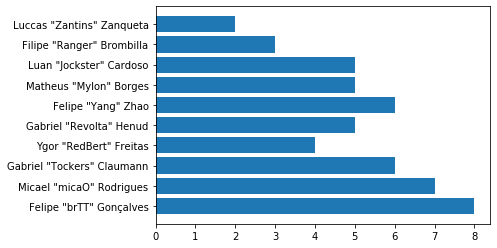

In [15]:
grupos = part_jog_sort1['Jogador']
valores = part_jog_sort1['Finais']
plt.barh(grupos, valores)
plt.show()

#### Novamente brTT e micaO se encontram nas primeiras colocações, fato curioso é que ambos são da mesma posição no jogo, são "Ad Carry" ou "Atiradores", normalmente são os responsáveis por causar maior dano na equipe.
#### Agora uma das mais esperadas por mim, era a análise de maior vice, quem merece o título de eterno cheirinho do CBLoL?

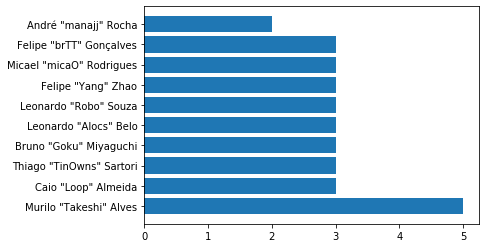

In [16]:
grupos = part_jog_sort2['Jogador']
valores = part_jog_sort2['Vices']
plt.barh(grupos, valores)
plt.show()

#### E o título ficou com o grande capitão, nosso Takeshi. Com 5 vices campeonatos, Takeshi nunca foi campeão do CBLoL, bateu na trave 5 vezes: 2013, 2014 (Final Regional), 2015 (1ª split), 2016 (1ª split), 2017 (1ª split).

In [17]:
premios.head()

,Categoria,Ganhador,Equipe,2017
0,Jogador Revelação,Absolut,Team One,2017
1,Caçador,4Lan,Team One,2017
2,Melhor Suporte,Jockster,INTZ,2017
3,Melhor Técnico,Neki,Team One,2017
4,Melhor Topo,Vvvert,Team One,2017


#### Neste quinto e último dataset, iremos descobrir quem foram os maiores vencedores dos prêmios individuais que são realizados pela Riot Games. 
#### Vale destacar que estes prêmios começaram em 2017, então ainda são bem recentes e consequentemente muitos jogadores que aposentaram anteriormente a esta data, não tiveram oportunidade para concorrer. 
#### Para plotar o primeiro gráfico, utilizei o Seaborn.

C:\Users\luigi\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


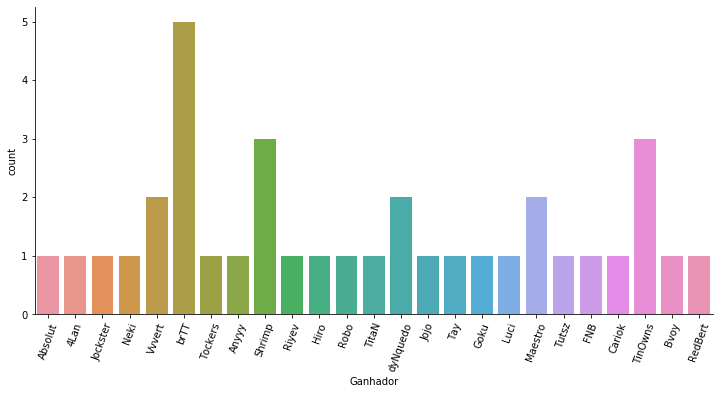

In [18]:


t = sns.factorplot('Ganhador', data=premios, kind='count', aspect=20/10)
t.set_xticklabels(rotation=70)



#### Novamente brTT figurando no topo, como o jogador mais premiado da história do CBLoL. Além de líder em finais, e títulos de campeão, brTT foi o jogador que mais foi premiado pela Riot Games.
#### Agora vamos conferir qual foi a equipe com mais premiações individuais de jogador/técnico, primeiro o código utilizado:

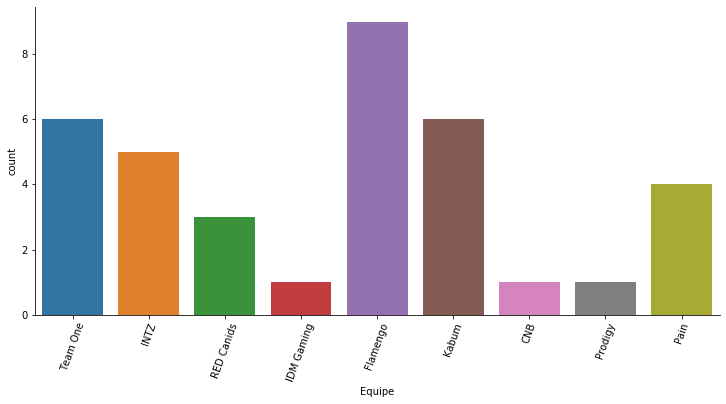

In [19]:
t1 = sns.factorplot('Equipe', data=premios, kind='count', aspect=20/10)
t1.set_xticklabels(rotation=70)